# Project:No_Show_Appointment Data Analysis

## Table of contents
- Introduction
- Data Wrangling
- Exploratory Data Analysis
- Conclusions

### Introduction

In this project we'll be analyzing the dataset which collects information from 100k medical appointments in
Brazil and is focused on the question of whether or not patients show up for their appointment, in particular,we'll be interested in finding trends among the patients who showed up to their appointment and how they differed from the patients who did notshow up.  
A number of characteristics about the patient are included in each row.
- ‘ScheduledDay’ tells us on what day the patient set up their appointment.
- ‘Neighborhood’ indicates the location of the hospital.
- ‘Scholarship’ indicates whether or not the patient is enrolled in Brasilian welfare program
- ‘No-show’ indicates whether or not the patient showed up to their appointment when it says ‘No’ this mean the patient showed up to their appointment, and when it says ‘Yes’ this mean they did not show up.


#### We are interested to answer the following nine questions:
- Research Question 1 : what is the percentage of attending in the appointment?

- Research Question 2 :How many patient in this dataset based on their gender?¶

- Research Question 3 : whether the Age is associted with showing up in the appointments ?¶

- Research Question 4: whether the Gender is associted with showing up in the appointments ?

- Research Question 5 : whether the Scholarship is associted with showing up in the appointments ?

- Research Question 6 : whether the Alcoholism is associted with showing up in the appointments ?

- Research Question 7 : whether the Handicap is associted with showing up in the appointments ?

- Research Question 8 : whether the Neighbourhood is associted with showing up in the appointments ?

- Research Question 9: whether the SMS_received is associted with showing up in the appointments ?


In [156]:
# Use this cell to set up import statements for all of the packages that you plan to use.
# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


### Data Wrangling
Tip: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your data cleaning steps in mark-down cells precisely and justify your cleaning decisions.

#### General Properties
Tip: You should not perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

In [157]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv', sep=',')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [158]:
# view dimensions of dataset
df.shape

(110527, 14)

There are 110527 patient(rows) and 14 characteristics about the patient(column).

In [159]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


- minimum  age is -1 year doesn't make sense
- maximamum age is 115 years

In [160]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [161]:
df.duplicated().sum()

0

- None of the characteristics about the patient have missing values
- None of the characteristics about the patient have duplicated values
- the spelling of Hipertension and Handcap is not correct
- No-show name needs to be changed to No_show 


#### Data Cleaning
Tip: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).

In [162]:
# drop the row associated to the age value = -1
df.drop(df.loc[df['Age']== -1].index, inplace=True)
# view dimensions of dataset to confirm the change
df.shape

(110526, 14)

In [163]:
# drop the PatientId, AppointmentID ,ScheduledDay ,AppointmentDay columns form the dataset as we won't be analyzing them 
df.drop(['PatientId','AppointmentID','ScheduledDay','AppointmentDay'], axis=1, inplace=True)
# view dimensions of dataset to confirm the change
df.shape

(110526, 10)

In [164]:
# correct Hypertension And ,Handicap spelling & rename No-show column
df.rename(columns={'Hipertension':'Hypertension','Handcap':'Handicap','No-show':'No_show'}, inplace=True)

In [165]:
#Take one last check to confirm all the changes
df.head()

,Gender,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show
0,F,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,56,JARDIM DA PENHA,0,1,1,0,0,0,No


### Exploratory Data Analysis
Tip: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. You should compute the relevant statistics throughout the analysis when an inference is made about the data. Note that at least two or more kinds of plots should be created as part of the exploration, and you must compare and show trends in the varied visualizations.

Tip: - Investigate the stated question(s) from multiple angles. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables. You should explore at least three variables in relation to the primary question. This can be an exploratory relationship between three variables of interest, or looking at how two independent variables relate to a single dependent variable of interest. Lastly, you should perform both single-variable (1d) and multiple-variable (2d) explorations.

- No_show is my dependent variable and [Gender -Age-Neighbourhood-Scholarship-Hypertension-Diabetes-Alcoholism-Handicap-SMS_received] are my independent variables.




#### Take a look at the  Histograms of the whole data frame

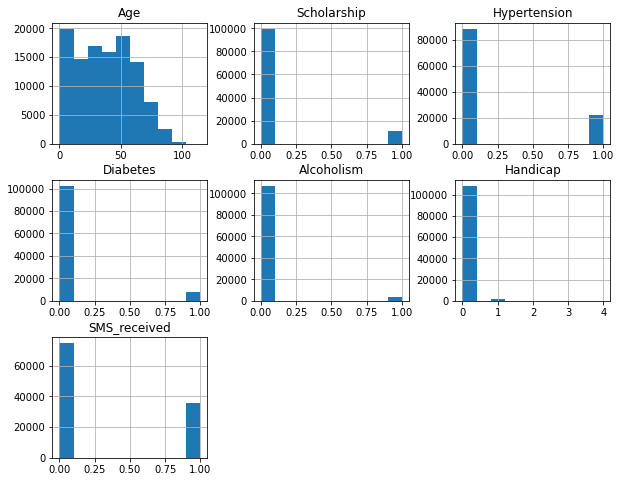

In [166]:
df.hist(figsize=(10, 8));

- Ages are skewed to the right with the majority being around 0 t0 65 years.
- The majority of people don't have scholsrship. 
- Less people suffer from chronic disease(Hypertension ,Diabetes).
- Most people didn't alcoholism.
- Also, most people didn't have handcap.
- the people who didn't  receive SMS is about 2 times the people who receive SMS .

In [167]:
# to make it easier to grab these rows easily in the future as well,create masks for rows where the patient showed up and rows where they didn't
show=df.No_show == 'No'
noShow=df.No_show=='Yes'

## Univariate Exploration

### Research Question 1 :  what is the percentage of attending in the appointment?

In [168]:
df[show].count()


Gender           88207
Age              88207
Neighbourhood    88207
Scholarship      88207
Hypertension     88207
Diabetes         88207
Alcoholism       88207
Handicap         88207
SMS_received     88207
No_show          88207
dtype: int64

In [169]:
df[noShow].count()

Gender           22319
Age              22319
Neighbourhood    22319
Scholarship      22319
Hypertension     22319
Diabetes         22319
Alcoholism       22319
Handicap         22319
SMS_received     22319
No_show          22319
dtype: int64

- create visuals to communicate results 

In [170]:
No_show_prop = df.No_show.value_counts('No_show')*100
No_show_prop

No     79.806561
Yes    20.193439
Name: No_show, dtype: float64

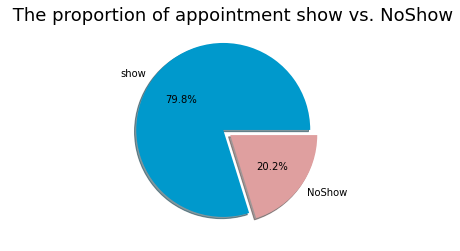

In [171]:
#plot(kind='pie')
No_show_proportion = df.No_show.value_counts()
labels = ['show', 'NoShow']
explode = (0.1, 0)
colors = ['#0099cc', '#df9f9f']

plt.pie(No_show_proportion , labels = labels, explode = explode, autopct= '%1.1f%%', counterclock=True, 
        textprops={'color':'black'}, colors = colors , shadow=True);
plt.title(' The proportion of appointment show vs. NoShow', fontsize = 18, loc = 'center',color ='black');

- From the chart we can see that the patients who showed up are 79.8 % and  the patients who didn't are 20.2 % .
- The patients who showed up are much more than the patients who didn't.

### Research Question 2:How many patient  in this dataset based on their gender?

In [172]:
# number of patients based on gender
df.Gender.value_counts()

F    71839
M    38687
Name: Gender, dtype: int64

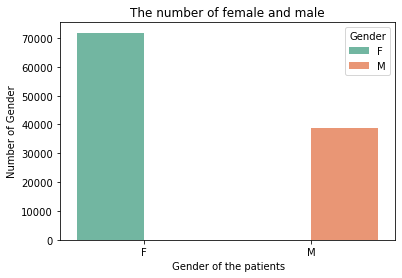

In [173]:
#The number of female and male
# hue :  This parameter take column name for colour encoding.
sns.countplot(data = df, x = 'Gender', palette="Set2",  hue = df.Gender)
plt.title("The number of female and male")
plt.xlabel(" Gender of the patients")
plt.ylabel("Number of Gender")
plt.show()

- females are definitely more than males.

### Bivariate Exploration

### Research Question 3 : whether the Age is associted with showing up in the appointments ?¶

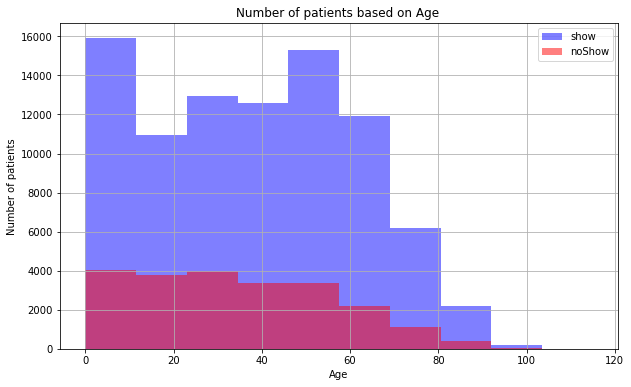

In [174]:
# bivariate data involving two variables & deals with causes or relationships
# how many patients who showed up and who didn't based on Age
def showtrend(df,col_name):
        plt.figure(figsize=[10.00,6.00])
        if col_name == 'Age':
            df.Age[show].hist(alpha=0.5,color='blue',label='show')
            df.Age[noShow].hist(alpha=0.5,color='red',label='noShow')
            # title and labels
            plt.xlabel('Age')
            plt.title('Number of patients based on Age ')
        elif col_name == 'Alcoholism':
            df.Alcoholism[show].hist(alpha=0.5,color='blue',label='show')
            df.Alcoholism[noShow].hist(alpha=0.5,color='red',label='noShow')
            # title and labels
            plt.xlabel('Alcoholism ')
            plt.title('Number of patients based on Alcoholism ')
        elif col_name == 'Handicap':
            df.Handicap[show].hist(alpha=0.5,color='blue',label='show')
            df.Handicap[noShow].hist(alpha=0.5,color='red',label='noShow')
            # title and labels
            plt.xlabel('Handicap ')
            plt.title('Number of patients based on Handicap ')         
        # ylabel
        plt.ylabel('Number of patients')
        # legend
        plt.legend()
        
showtrend(df,'Age')

- based on this plot, it does look like the really young children (from age 0 to 11 years)have a higher chance of showing up than other ages,followed by ages from 45 to 58 years ,but other than that it doesn't look like they're too correlated.

### Research Question 4 : whether the Gender is associted with showing up in the appointments ?

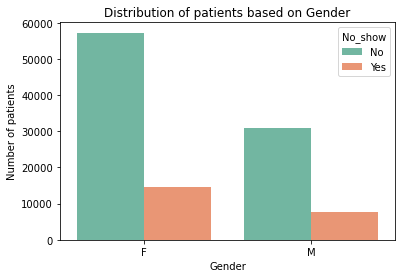

In [175]:
# how many patients who showed up and who didn't based on Gender

sns.countplot(data = df, x = 'Gender', palette="Set2",  hue = df.No_show)
plt.title("Distribution of patients based on Gender")
# title and labels
plt.xlabel("Gender")
plt.ylabel("Number of patients")
plt.show()


In [176]:
df.groupby('Gender').No_show.value_counts()

Gender  No_show
F       No         57245
        Yes        14594
M       No         30962
        Yes         7725
Name: No_show, dtype: int64

Text(0, 0.5, 'Number of patients')

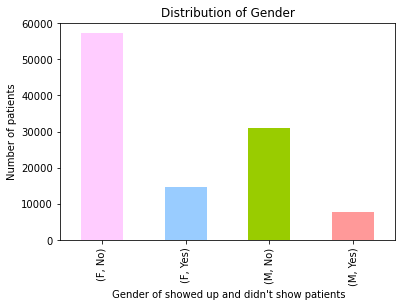

In [177]:
df.groupby('Gender').No_show.value_counts().plot(kind='bar',color=['#ffccff','#99ccff','#99cc00','#ff9999']);
plt.title("Distribution of Gender")
plt.xlabel(" Gender of showed up and didn't show patients")
plt.ylabel("Number of patients")


(F,No )  : means femals who showed up in the appointments.

(F,Yes ) : means femals who didn't show up in the appointments.

(M,No )  : means femals who showed up in the appointments.

(M,Yes ) : means femals who didn't show up in the appointments.

- There does seem to be no clear relation between gender and showing  up or not, but it seems that females are definitely more  showing up than males.

###  Research Question 5 : whether the Scholarship is associted with showing up in the appointments ?

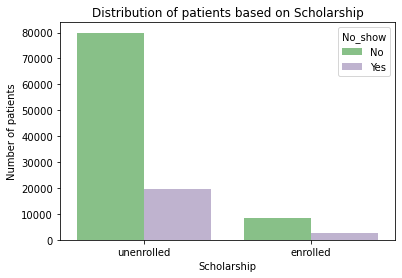

In [178]:
# how many patients who showed up and who didn't based on Scholarship
sns.countplot(data = df, x = 'Scholarship', palette="Accent",  hue = df.No_show)
plt.title("Distribution of patients based on Scholarship")
# title and labels
plt.xlabel("Scholarship")
plt.ylabel("Number of patients")
plt.xticks([0, 1],['unenrolled','enrolled'])
plt.show()


- There does seem to be no clear relation between Scholarship and showing up or not.The most of the patient did unenroll in Brazilian welfare program and showed up in their appointments.

#### Research Question 6 : whether the Alcoholism  is associted with showing up in the appointments ?

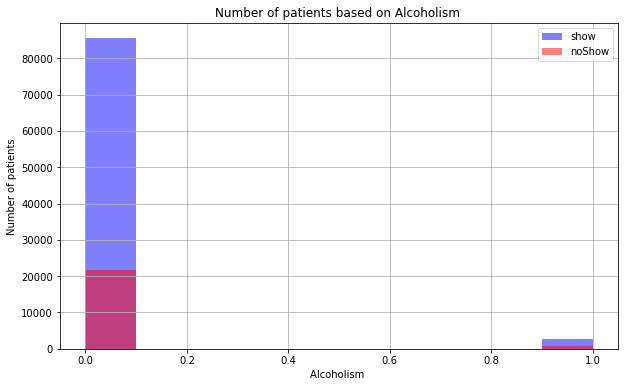

In [179]:
# how many patients who showed up and who didn't based on Alcoholism 
showtrend(df,'Alcoholism')

- There does seem to be no clear relation between Alcoholism and showing up or not.

###  Research Question 7 : whether the Handicap  is associted with showing up in the appointments ?

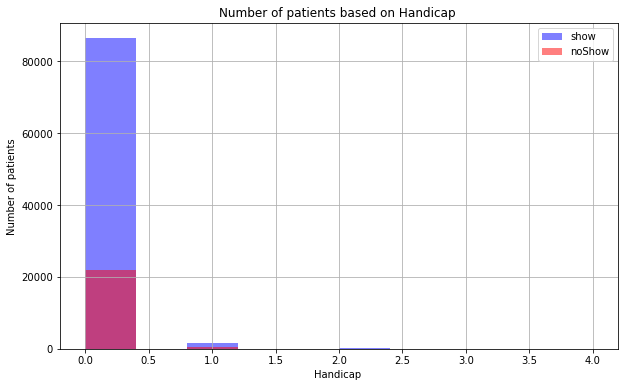

In [180]:
# how many patients who showed up and who didn't based on Handicap
showtrend(df,'Handicap')

- There does seem to be no clear relation between Handicap and showing  up or not.

###  Research Question 8 : whether the Neighbourhood  is associted with showing up in the appointments ?

Text(0.5, 1.0, 'Number of patients based on Neighbourhood ')

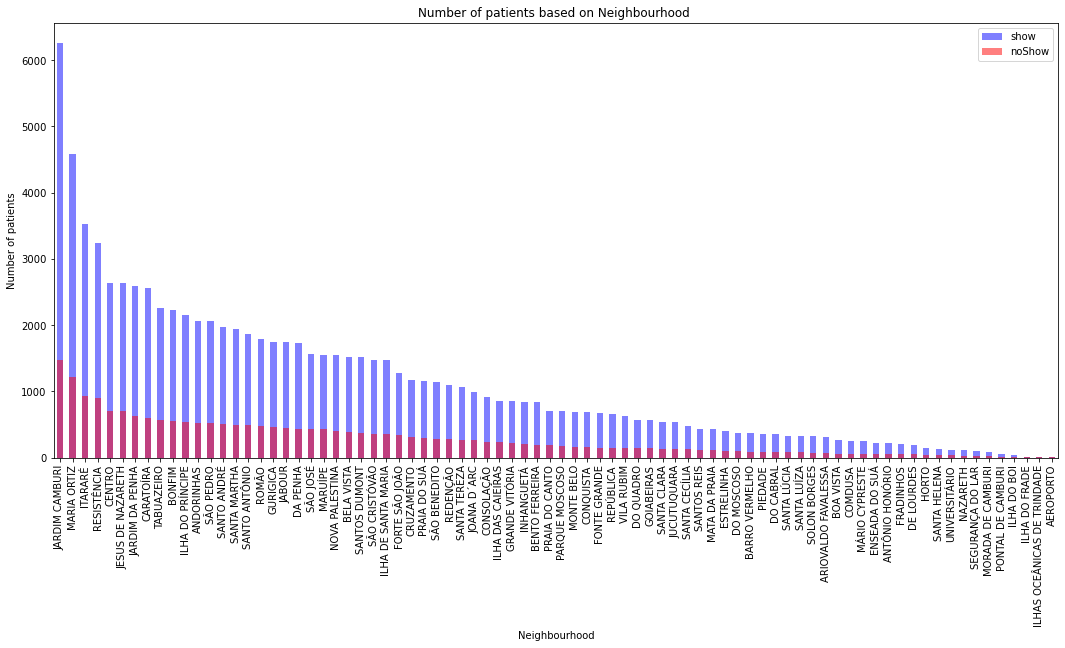

In [181]:
# how many patients who showed up and who didn't based on Neighbourhood
#  it is better to use Bar chart than histogram to visualize this characteristic 
plt.figure(figsize=[18.00,8.00])
df.Neighbourhood[show].value_counts().plot(kind='bar',alpha=0.5,color='blue',label='show')
df.Neighbourhood[noShow].value_counts().plot(kind='bar',alpha=0.5,color='red',label='noShow')
# legend
plt.legend()
# title and labels
plt.ylabel('Number of patients')
plt.xlabel('Neighbourhood')
plt.title('Number of patients based on Neighbourhood ')

In [182]:
df.Neighbourhood.value_counts()

JARDIM CAMBURI                 7717
MARIA ORTIZ                    5805
RESISTÊNCIA                    4431
JARDIM DA PENHA                3877
ITARARÉ                        3514
                               ... 
ILHA DO BOI                      35
ILHA DO FRADE                    10
AEROPORTO                         8
ILHAS OCEÂNICAS DE TRINDADE       2
PARQUE INDUSTRIAL                 1
Name: Neighbourhood, Length: 81, dtype: int64

- The neighborhood has a huge impact on attendance and JARDIM CAMBURI has the largest number of patients and also has the largest number of appointment attendees.

###  Research Question 9: whether the  SMS_received   is associted with showing up in the appointments ?

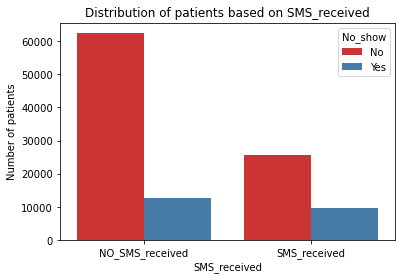

In [183]:
# how many patients who showed up and who didn't based on SMS_received
sns.countplot(data = df, x = 'SMS_received', palette="Set1",  hue = df.No_show)
plt.title("Distribution of patients based on SMS_received")
# title and labels
plt.xlabel("SMS_received")
plt.ylabel("Number of patients")
plt.xticks([0, 1],['NO_SMS_received','SMS_received'])
plt.show()

- patients who didn't receive SMS showed up more than patients who received  SMS, which is weird.

## Conclusions

## Univariate Exploration

#### Research Question 1 : what is the percentage of attending in the appointment?
The patients who showed up are 79.8 % and the patients who didn't are 20.2 % ,which means The patients who showed up are much more than the patients who didn't.

####  Research Question 2 :How many patient  in this dataset based on their gender?
The number of female patients (71839) and number of male patients (38687).
females are definitely more than males in this data set.

## Bivariate Exploration

#### Research Question 3 : whether the Age is associted with showing up in the appointments ?¶

Young children (from age 0 to 11 years)have a higher chance of showing up than other ages,followed by ages from 45 to 58 years ,but other than that it doesn't look like they're too correlated.

#### Research Question 4: whether the Gender is associted with showing up in the appointments ?
There does seem to be no clear relation between gender and showing  up or not, but it seems that females are definitely more  showing up than males.

#### Research Question 5 : whether the Scholarship is associted with showing up in the appointments ?
There does seem to be no clear relation between Scholarship and showing up or not.
The most of the patient did unenroll in Brazilian welfare program and showed up in their appointments.


#### Research Question 6 : whether the Alcoholism  is associted with showing up in the appointments ?
There does seem to be no clear relation between Alcoholism and showing up or not.
The most of the patient were not alcoholism  and showed up in their appointments.


#### Research Question 7 : whether the Handicap is associted with showing up in the appointments ?
There does seem to be no clear relation between Handicap and showing up or not.


#### Research Question 8 : whether the Neighbourhood is associted with showing up in the appointments ?
The neighborhood has a huge impact on attendance and JARDIM CAMBURI has the largest number of patients  and also has the largest number of appointment attendees.

#### Research Question 9: whether the SMS_received is associted with showing up in the appointments ?
- patients who didn't receive SMS showed up more than patients who received  SMS, which is weird.

- additional research should be done to investigat why patients who didn't receive SMS showed up more than patients who received  SMS.


## limitations 
- There is no enough information to predict exactly the correlation between showing up in the appointment and many characteristics of the patients such as Gender,Scholarship,Alcoholism,Handicap.







